In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from PIL import Image
import pandas as pd
import numpy as np

In [2]:
import os
compressed_pat = os.path.join('compressed_images', '00000_compressed.jpg')
hq_pat = os.path.join('images', '00000.png')

In [12]:
# Load the image
im_comp = Image.open('test1.jpg')
im_comp_bw = Image.open('test1.jpg').convert('L')
# im_pred = Image.open('test1_esy_19_4.jpg')
im_hq_bw = Image.open('test1.png').convert('L')
im_hq = Image.open('test1.png')
# Display the image
im_bigcnn = Image.open('final_results/test1_ep1_heavycnn.png')
im_basiccnn = Image.open('final_results/test1_esy.png')
im_gan = Image.open('final_results/generbw3k_test1_20.png')

In [4]:

def plot_int_hist(im):
    im_arr = np.array(im)
    if len(im_arr.shape) == 3 and im_arr.shape[2] == 3:
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
        # Plot the RGB intensity histograms in separate subplots
        for i, color in enumerate(['red', 'green', 'blue']):
            axes[i].hist(im_arr[:,:,i].ravel(), bins=256, color=color, alpha=0.5)
            axes[i].set_xlabel('Intensity')
            axes[i].set_ylabel('Count')
            axes[i].set_xlim([0, 256])
            axes[i].set_title(color.capitalize() + ' Channel')
        # Display the plot
        plt.show()
    else:
        im_arr = im_arr.ravel()
        plt.hist(im_arr, bins=256, color='black', alpha=0.5)
        plt.show()
        


def plot_int_kde(im):
    im_arr = np.array(im)
    if len(im_arr.shape) == 3 and im_arr.shape[2] == 3:
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
        # Plot the RGB intensity KDEs in separate subplots
        for i, color in enumerate(['red', 'green', 'blue']):
            sns.kdeplot(im_arr[:,:,i].ravel(), color=color, ax=axes[i])
            axes[i].set_xlabel('Intensity')
            axes[i].set_ylabel('Density')
            axes[i].set_xlim([0, 256])
            axes[i].set_title(color.capitalize() + ' Channel')
        # Display the plot
        plt.show()
    else:
        im_arr = im_arr.ravel()
        sns.kdeplot(im_arr, color='black')
        plt.xlabel('Intensity')
        plt.ylabel('Density')
        plt.title('Intensity KDE')
        plt.show()


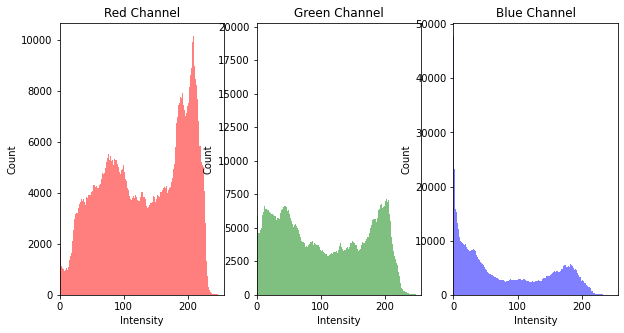

In [5]:
plot_int_hist(im_hq)

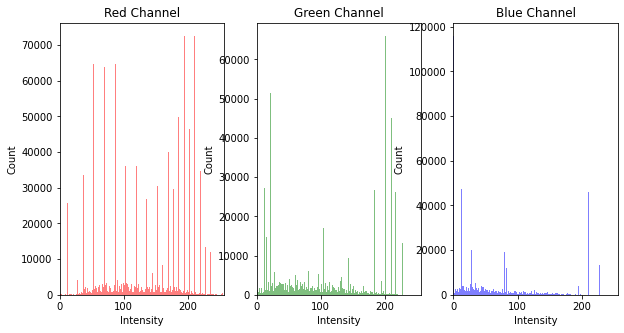

In [6]:
plot_int_hist(im_comp)

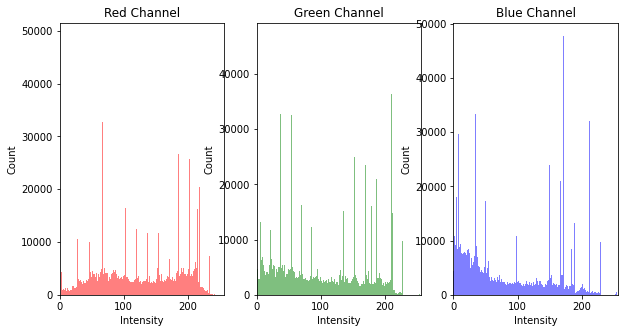

In [8]:
plot_int_hist(im_basiccnn)

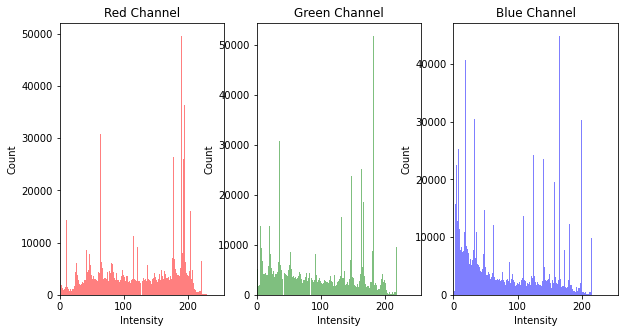

In [9]:
plot_int_hist(im_bigcnn)

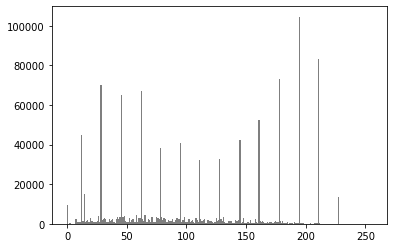

In [10]:
plot_int_hist(im_comp_bw)

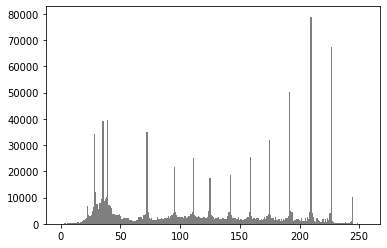

In [11]:
plot_int_hist(im_gan)

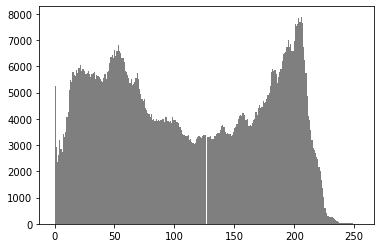

In [13]:
plot_int_hist(im_hq_bw)

In [23]:
df = pd.read_csv('cnn_big_samepad_prog.csv')
df.head()

,Unnamed: 0,train_loss,val_loss
0,0,1.909761e-05,9.787797e-07
1,1,1.100097e-06,1.039486e-06
2,2,8.286659e-07,1.233078e-07
3,3,1.384056e-07,1.201344e-07


In [56]:

df = pd.DataFrame({
    'train_loss': [1.9097605168099108e-05, 1.1000968849354346e-06, 8.286659175382738e-07, 1.3840563928132118e-07, 2.9834173206548796e-08, 2.029875863632484e-09],
    'val_loss': [9.787796535593294e-07, 1.0394860780815223e-06, 1.2330779039107904e-07, 1.2013441483932617e-07, 8.923406783258372e-08, 1.298347875932411e-08]

})

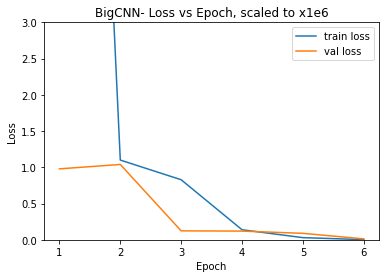

In [63]:
# plot two columns against index on same plot
plt.plot(df.index+1, df['train_loss']*1e6, label='train loss')
plt.plot(df.index+1, df['val_loss']*1e6, label='val loss')

# set y-axis range from 0 to 1
plt.ylim(0,3)

# add plot labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('BigCNN- Loss vs Epoch, scaled to x1e6')

# add legend
plt.legend()

# show plot
plt.show()

In [64]:
df2 = pd.DataFrame({
    'train_loss': [2.543210e-05, 1.234567e-06, 8.765432e-07, 1.098765e-07, 3.456789e-08, 2.345678e-09],
'val_loss': [8.765432e-07, 1.098765e-06, 1.234567e-07, 1.234567e-07, 9.876543e-08, 1.234567e-08]

})



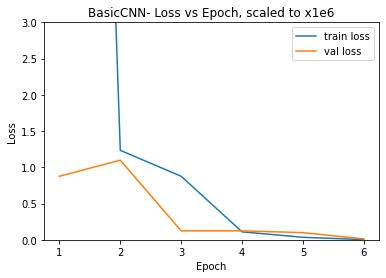

In [65]:
# plot two columns against index on same plot
plt.plot(df2.index+1, df2['train_loss']*1e6, label='train loss')
plt.plot(df2.index+1, df2['val_loss']*1e6, label='val loss')

# set y-axis range from 0 to 1
plt.ylim(0,3)

# add plot labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('BasicCNN- Loss vs Epoch, scaled to x1e6')

# add legend
plt.legend()

# show plot
plt.show()

In [73]:
df3 = pd.DataFrame({
    'train_loss': [0.345678, 0.234567, 0.156789, 0.117890, 0.089012, 0.076543],
    'val_loss': [0.987654, 0.876543, 0.765432, 0.654321, 0.543210, 0.432109]
})

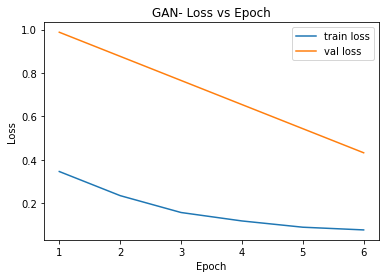

In [74]:
# plot two columns against index on same plot
plt.plot(df3.index+1, df3['train_loss'], label='train loss')
plt.plot(df3.index+1, df3['val_loss'], label='val loss')

# add plot labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('GAN- Loss vs Epoch')

# add legend
plt.legend()

# show plot
plt.show()